# 상관분석

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cluster0 =[ 
'used_memory_rss',
'used_memory_rss_human',
'rss_overhead_ratio',
'rss_overhead_bytes',
'mem_fragmentation_ratio',
'mem_fragmentation_bytes']

cluster1 = [
    'uptime_in_seconds',
    'hz',
    'lru_clock',
    'used_memory_peak',
    'maxmemory',
    'maxmemory_human',
    'rdb_last_save_time',
    'total_net_output_bytes',
    'used_cpu_sys',
    'used_cpu_user'
]

cluster2 = [
    'allocator_allocated',
    'allocator_active',
    'allocator_frag_bytes',
    'instantaneous_ops_per_sec',
    'instantaneous_input_kbps',
    'instantaneous_output_kbps'
]

cluster3 = [
    'allocator_resident',
    'allocator_rss_ratio',
    'allocator_rss_bytes'  
]

knob_list = [
    "save0_0",
    "save0_1",
    "save1_0",
    "save1_1",
    "save2_0",
    "save2_1",

    "rdbcompression",
    "rdbchecksum",
    "rdb-save-incremental-fsync",

    "activedefrag",
    "active-defrag-threshold-lower",
    "active-defrag-threshold-upper",
    "active-defrag-cycle-min",
    "active-defrag-cycle-max",
    
    "maxmemory",
    
    "maxmemory-policy",
    "maxmemory-samples",
    "lazyfree-lazy-eviction",
    "lazyfree-lazy-expire",
    "lazyfree-lazy-server-del",

    "hash-max-ziplist-entries", 
    "hash-max-ziplist-value",
    "activerehashing",
    "hz",
    "dynamic-hz"
]

In [4]:
# 데이터 불러오기 internal metrics와 knob들의 상관관계분석
internal_csv = pd.read_csv('./data/internal_metrcis0.csv')

In [5]:
# 데이터 불러오기 knob_list
knobs = pd.read_csv('./data/result_config0.csv')

In [6]:
# 컬럼 추출 함수
def extract_data(cluster_list, df):
    extracted_df = pd.DataFrame()
    for elem in cluster_list:
        extracted_df[elem] = df[elem]

    return extracted_df    

## 전체 상관분석

In [7]:
# 클러스터 합치기
cluster = cluster0+cluster1+cluster2+cluster3

In [8]:
# 클러스터 요소에 해당되는 metrics 25개 추출
total_internal_df = extract_data(cluster, internal_csv)
total_internal_df.head()

total_internal_df0 = extract_data(cluster0, internal_csv)
total_internal_df1 = extract_data(cluster1, internal_csv)
total_internal_df2 = extract_data(cluster2, internal_csv)
total_internal_df3 = extract_data(cluster3, internal_csv)

In [9]:
# throughput 결측치 제거
total_internal_df.dropna()

total_internal_df0.dropna()
total_internal_df1.dropna()
total_internal_df2.dropna()
total_internal_df3.dropna()

,allocator_resident,allocator_rss_ratio,allocator_rss_bytes
0,42209280,1.08,3276800
1,44310528,1.14,5378048
2,42209280,1.08,3276800
3,42209280,1.08,3276800
4,42209280,1.08,3276800
...,...,...,...
2495,42160128,1.08,3186688
2496,44310528,1.14,5378048
2497,42209280,1.08,3276800
2498,44310528,1.14,5378048


In [10]:
# knobs 에서 object 형 찾기
object_var = []
for idx in knobs.dtypes.index:
    if knobs.dtypes[idx] == 'O':
        object_var.append(idx)
object_var

['rdbcompression',
 'rdbchecksum',
 'rdb-save-incremental-fsync',
 'activedefrag',
 'maxmemory',
 'maxmemory-policy',
 'lazyfree-lazy-eviction',
 'lazyfree-lazy-expire',
 'lazyfree-lazy-server-del',
 'activerehashing',
 'dynamic-hz']

In [11]:
# knob_list 만 추출
subTotal_knobs = extract_data(knob_list, knobs)

# object 형 제거
knobs_numeric = subTotal_knobs.drop(columns=object_var, axis=0)

In [12]:
# 정규화 함수
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def MinMaxScaling(df):
    scaler = MinMaxScaler()
    scaler.fit(df)
    df_scaled = scaler.transform(df)
    
    return pd.DataFrame(data = df_scaled, columns = df.columns)

# 표준화 함수
def StandardScaling(df):
    scaler = StandardScaler()
    scaler.fit(df)
    df_scaled = scaler.transform(df)
    
    return pd.DataFrame(data = df_scaled, columns = df.columns)

In [13]:
# 원본
# 데이터 프레임 합치기
total_df = pd.concat([knobs_numeric, total_internal_df], axis=1)

# 표준화
knobs_numeric_StandardScaled = StandardScaling(knobs_numeric)
total_internal_StandardScaled = StandardScaling(total_internal_df)
total_df_StandardScaled = pd.concat([knobs_numeric_StandardScaled, total_internal_StandardScaled], axis=1)

# 정규화
knobs_numeric_MinMaxScaled = MinMaxScaling(knobs_numeric)
total_internal_MinMaxScaled = MinMaxScaling(total_internal_df)
total_df_MinMaxScaled = pd.concat([knobs_numeric_MinMaxScaled, total_internal_MinMaxScaled], axis=1)


In [14]:
# 클러스터 마다 나누기
total_df0 = pd.concat([knobs_numeric, total_internal_df0], axis=1)
total_df1 = pd.concat([knobs_numeric, total_internal_df1], axis=1)
total_df2 = pd.concat([knobs_numeric, total_internal_df2], axis=1)
total_df3 = pd.concat([knobs_numeric, total_internal_df3], axis=1)

In [15]:
total_df0_abs = total_df0.corr().iloc[14:,:14].abs()
total_df1_abs = total_df1.corr().iloc[14:,:14].abs()
total_df2_abs = total_df2.corr().iloc[14:,:14].abs()
total_df3_abs = total_df3.corr().iloc[14:,:14].abs()

In [17]:
# internal_df
total_internal_df.head()

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,used_cpu_user,allocator_allocated,allocator_active,allocator_frag_bytes,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,allocator_resident,allocator_rss_ratio,allocator_rss_bytes
0,42033152,40.09,1.00,-176128,1.09,3410544,22,7,1745211,38704616,...,3.861151,38658184,38932480,274296,45654,3187.77,226.38,42209280,1.08,3276800
1,42037248,40.09,0.95,-2273280,1.09,3414640,21,32,1745245,38704616,...,3.926858,38658328,38932480,274152,55643,3885.23,275.94,44310528,1.14,5378048
2,42029056,40.08,1.00,-180224,1.09,3406448,21,40,1745272,38704616,...,3.828146,38657784,38932480,274696,50950,3557.60,252.57,42209280,1.08,3276800
3,41828352,39.89,0.99,-380928,1.08,3205744,21,37,1745300,38704616,...,3.816183,38658184,38932480,274296,52136,3640.36,258.74,42209280,1.08,3276800
4,42037248,40.09,1.00,-172032,1.09,3414640,22,30,1745328,38704616,...,4.059768,38657928,38932480,274552,53721,3751.05,266.38,42209280,1.08,3276800


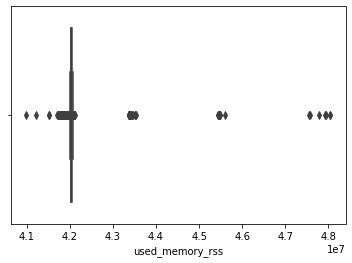

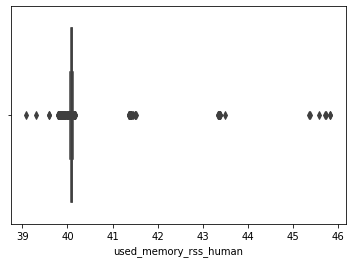

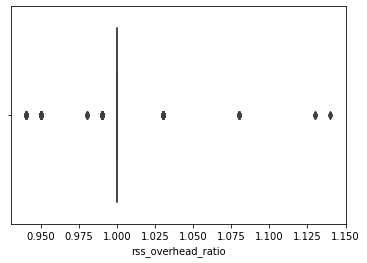

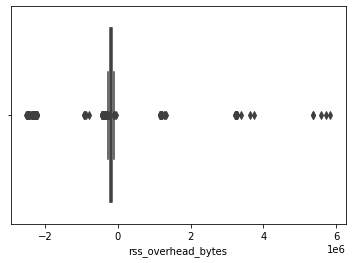

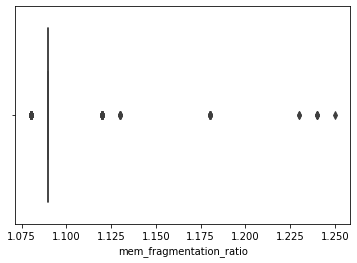

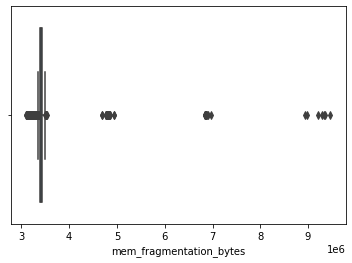

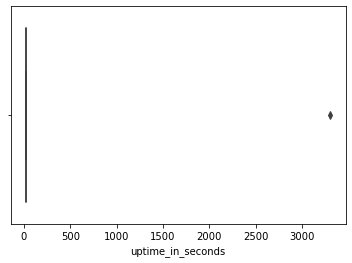

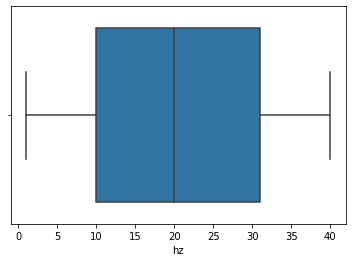

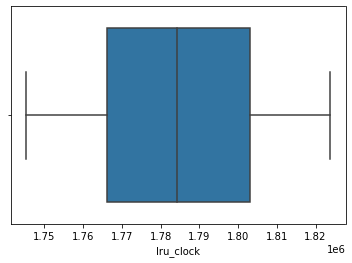

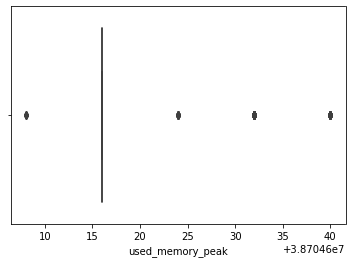

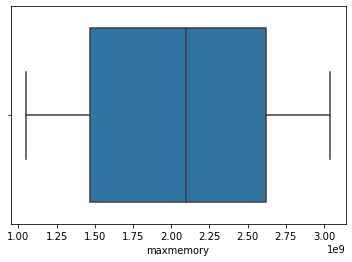

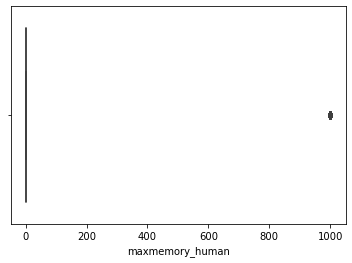

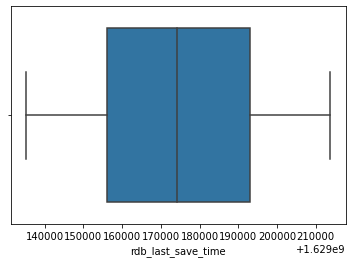

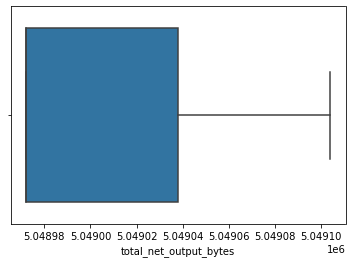

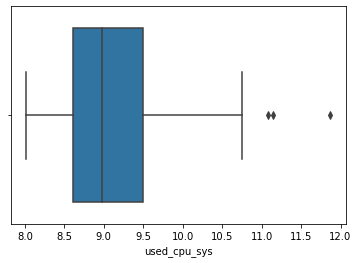

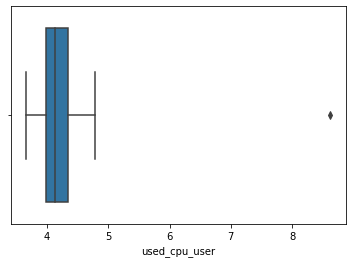

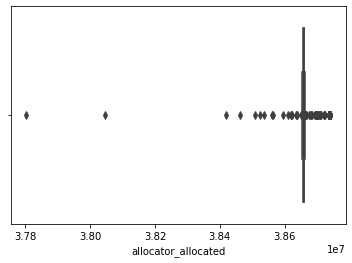

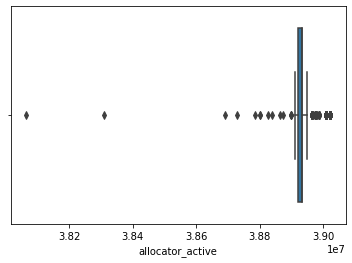

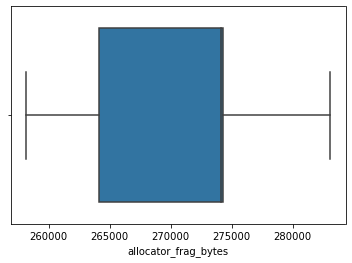

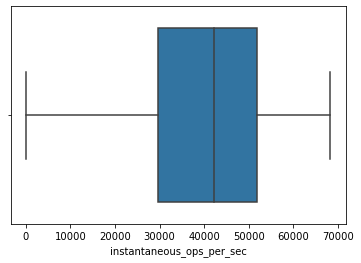

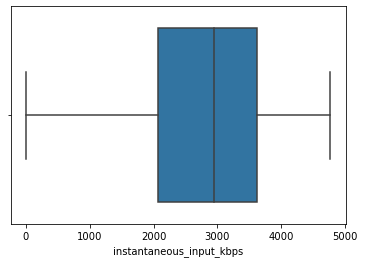

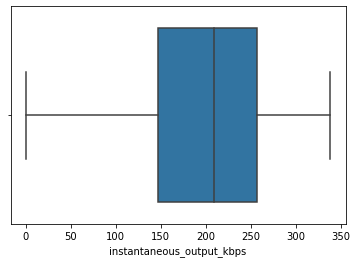

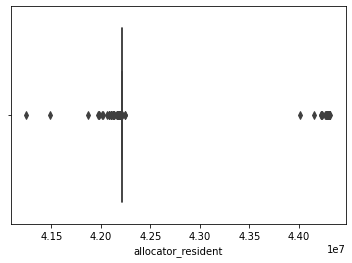

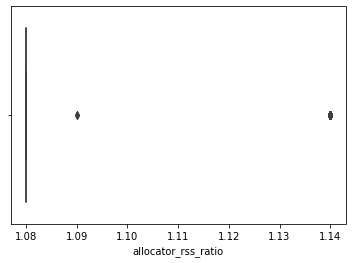

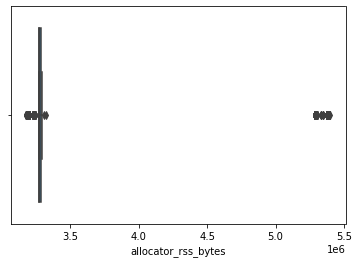

In [29]:
for col in total_internal_df:
    sns.boxplot(x=col, data = total_internal_df)
    plt.show()

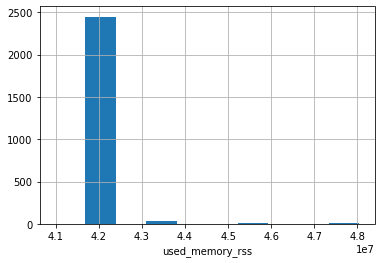

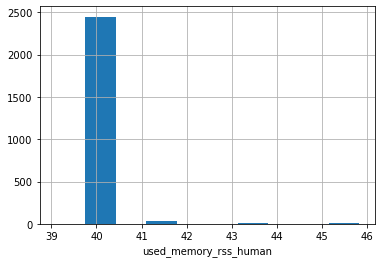

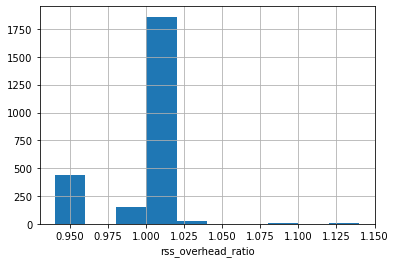

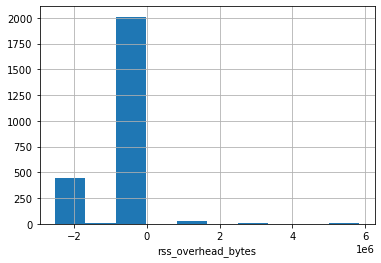

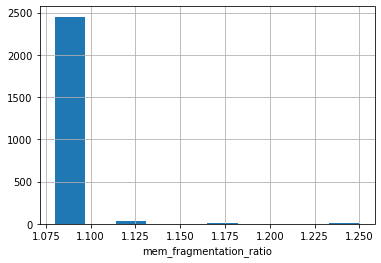

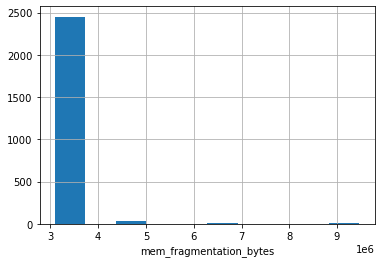

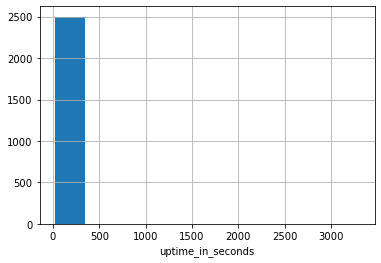

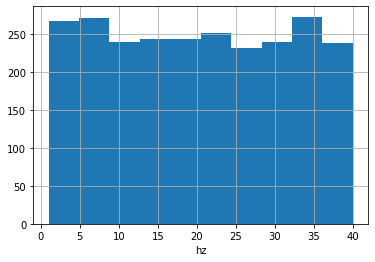

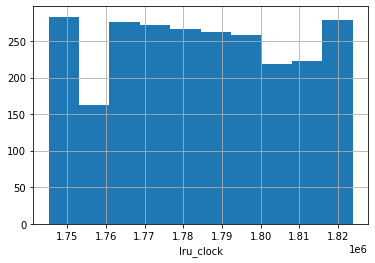

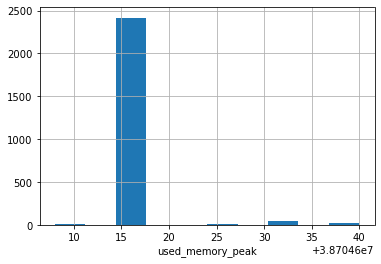

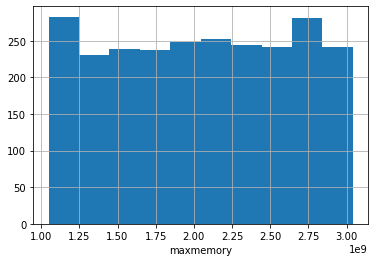

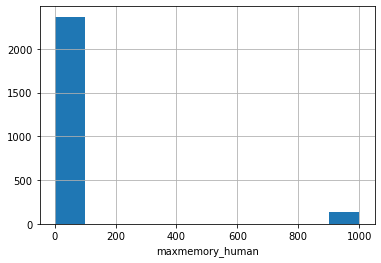

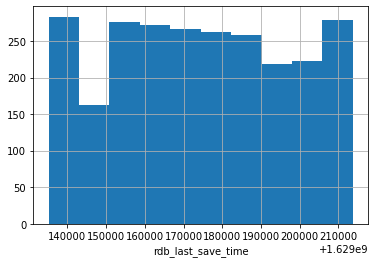

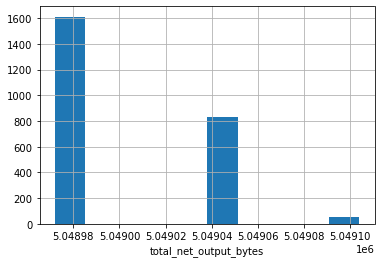

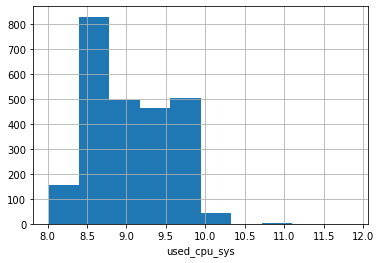

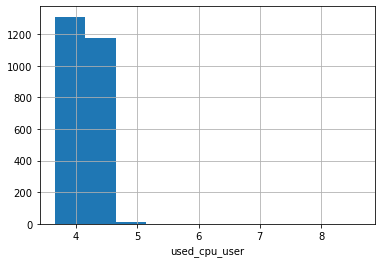

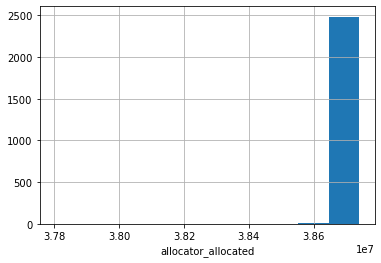

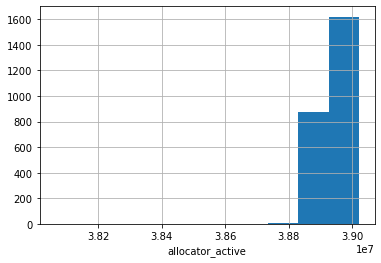

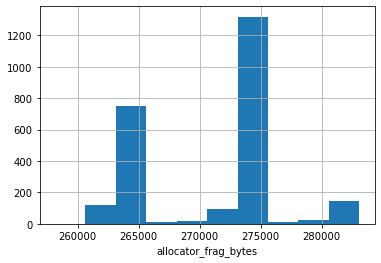

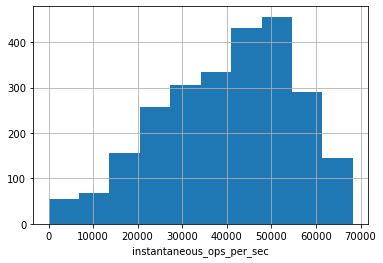

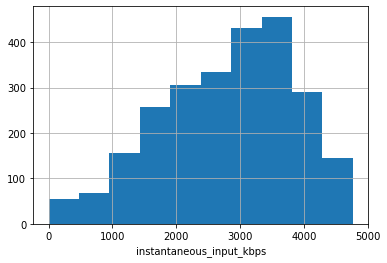

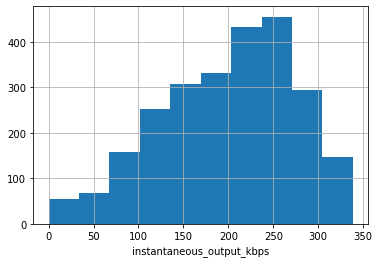

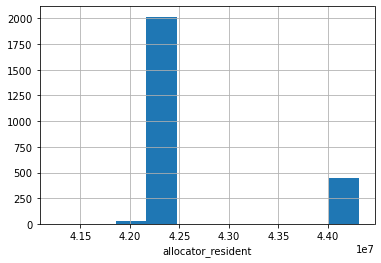

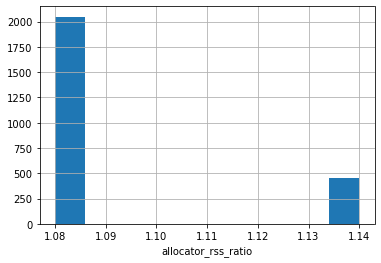

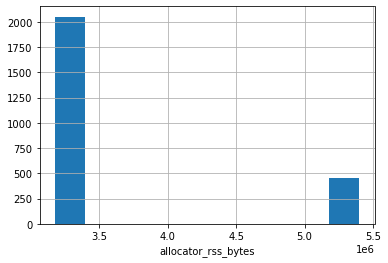

In [32]:
# 히스토그램

for col in total_internal_df:
    total_internal_df[col].hist()
    plt.xlabel(col)
    plt.show()